In [33]:
from ps4_implementation import svm_qp
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [21]:
data = np.load('/Users/yanqingluo/Desktop/LabML/git/problem_set4/data/easy_2d.npz')
print(data.files)

['Y_te', 'X_te', 'X_tr', 'Y_tr']


In [30]:
X_train = data['X_tr']
X_train = X_train.T
y_train = data['Y_tr']
X_test = data ['X_te']
X_test = X_test.T
y_test = data ['Y_te']
print(X_train, y_train.shape)

<class 'numpy.ndarray'> (100,)


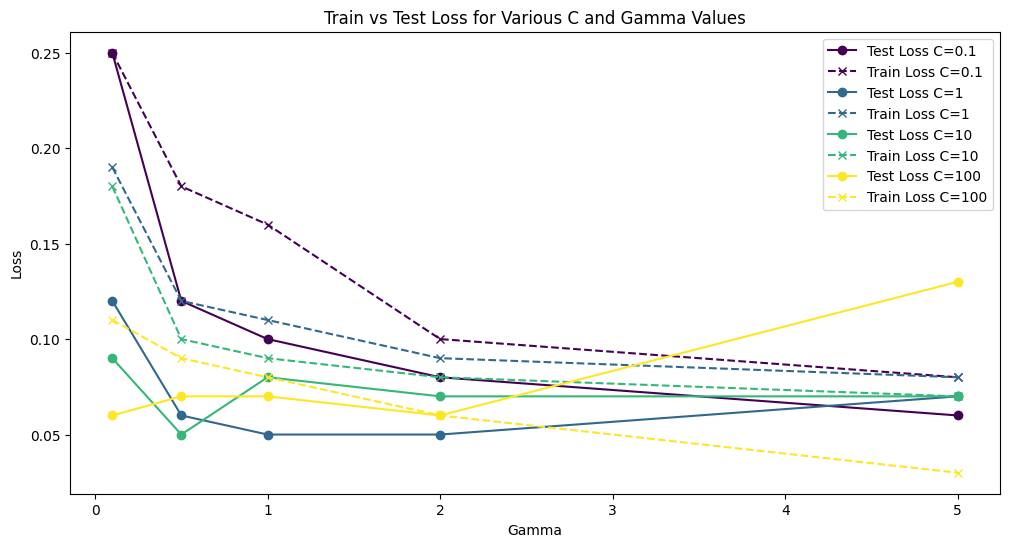

In [38]:
import pandas as pd
C_values = [0.1, 1, 10, 100]
gamma_values = [0.1, 0.5, 1, 2, 5]
results = []

# Loop over each combination of parameters
for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        # Calculate losses
        train_loss = 1 - accuracy_score(y_train, train_pred)
        test_loss = 1 - accuracy_score(y_test, test_pred)
        
        results.append((C, gamma, train_loss, test_loss))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['C', 'Gamma', 'Train Loss', 'Test Loss'])

# Plotting
colors = plt.cm.viridis(np.linspace(0, 1, len(C_values)))

# Plotting
plt.figure(figsize=(12, 6))
for i, C in enumerate(C_values):
    subset = results_df[results_df['C'] == C]
    plt.plot(subset['Gamma'], subset['Test Loss'], marker='o', linestyle='-', color=colors[i], label=f'Test Loss C={C}')
    plt.plot(subset['Gamma'], subset['Train Loss'], marker='x', linestyle='--', color=colors[i], label=f'Train Loss C={C}')

plt.xlabel('Gamma')
plt.ylabel('Loss')
plt.title('Train vs Test Loss for Various C and Gamma Values')
plt.legend()
plt.show()


Overfitting Model Training Accuracy: 1.0
Overfitting Model Testing Accuracy: 0.79
Overfitting Model Classification Report (Test):
               precision    recall  f1-score   support

          -1       0.87      0.77      0.81        60
           1       0.70      0.82      0.76        40

    accuracy                           0.79       100
   macro avg       0.79      0.80      0.79       100
weighted avg       0.80      0.79      0.79       100

Underfitting Model Training Accuracy: 0.75
Underfitting Model Testing Accuracy: 0.75
Underfitting Model Classification Report (Test):
               precision    recall  f1-score   support

          -1       0.76      0.85      0.80        60
           1       0.73      0.60      0.66        40

    accuracy                           0.75       100
   macro avg       0.74      0.72      0.73       100
weighted avg       0.75      0.75      0.74       100



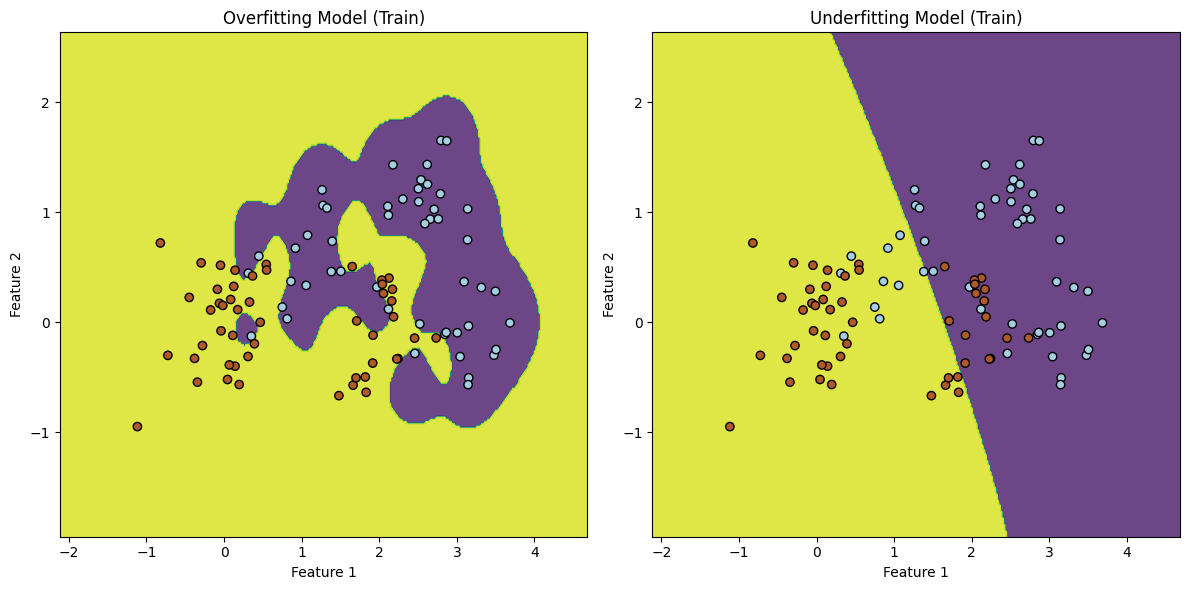

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define a function to plot decision boundaries
def plot_decision_boundary(model, X, y, title="Model Decision Boundary"):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.contourf(xx, yy, model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

# Assume X_train, X_test, y_train, y_test are defined
# Training a model likely to overfit
model_overfit = SVC(C=100, gamma=10)
model_overfit.fit(X_train, y_train)
train_pred_overfit = model_overfit.predict(X_train)
test_pred_overfit = model_overfit.predict(X_test)
train_acc_overfit = accuracy_score(y_train, train_pred_overfit)
test_acc_overfit = accuracy_score(y_test, test_pred_overfit)

print("Overfitting Model Training Accuracy:", train_acc_overfit)
print("Overfitting Model Testing Accuracy:", test_acc_overfit)
print("Overfitting Model Classification Report (Test):\n", classification_report(y_test, test_pred_overfit))

# Training a model likely to underfit
model_underfit = SVC(C=0.1, gamma=0.1)
model_underfit.fit(X_train, y_train)
train_pred_underfit = model_underfit.predict(X_train)
test_pred_underfit = model_underfit.predict(X_test)
train_acc_underfit = accuracy_score(y_train, train_pred_underfit)
test_acc_underfit = accuracy_score(y_test, test_pred_underfit)

print("Underfitting Model Training Accuracy:", train_acc_underfit)
print("Underfitting Model Testing Accuracy:", test_acc_underfit)
print("Underfitting Model Classification Report (Test):\n", classification_report(y_test, test_pred_underfit))

# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_overfit, X_train, y_train, "Overfitting Model (Train)")

plt.subplot(1, 2, 2)
plot_decision_boundary(model_underfit, X_train, y_train, "Underfitting Model (Train)")
plt.tight_layout()
plt.show()


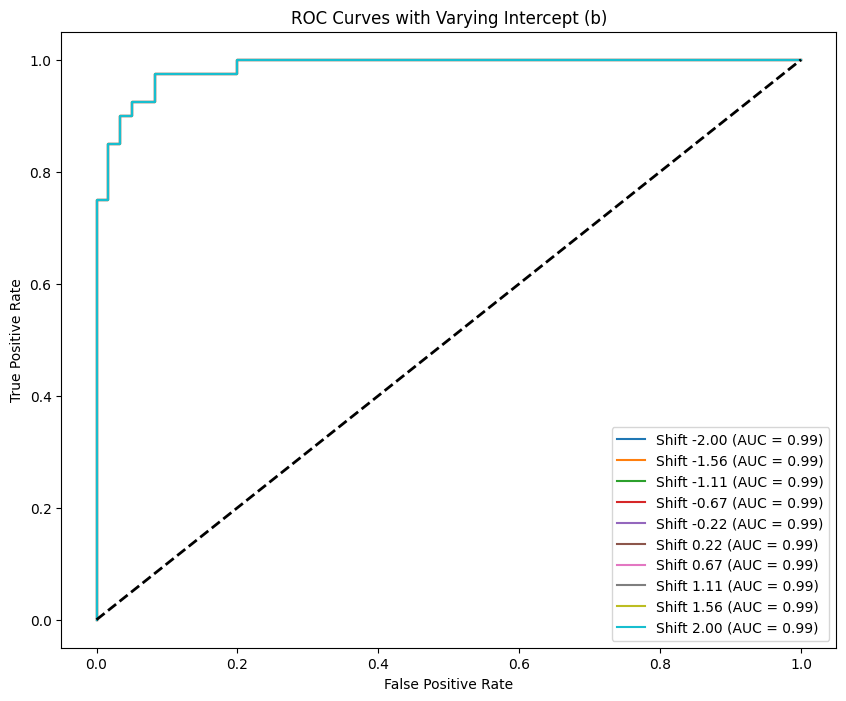

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Train SVM with optimal parameters found from previous optimization
optimal_C = 10  # example value
optimal_gamma = 2  # example value
model = SVC(C=optimal_C, gamma=optimal_gamma, probability=True)
model.fit(X_train, y_train)

# Get decision function scores
decision_function_scores = model.decision_function(X_test)

# Range of intercepts to test
intercept_shifts = np.linspace(-2, 2, 10)  # Adjust these values based on your data range

plt.figure(figsize=(10, 8))

for shift in intercept_shifts:
    # Adjust the intercept
    adjusted_scores = decision_function_scores - shift
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, adjusted_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Shift {shift:.2f} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves with Varying Intercept (b)')
plt.legend(loc="lower right")
plt.show()
